In [448]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [449]:
df = pd.read_csv('Downloads/House_Rent_Dataset.csv')
null_values = df.isnull()

# Count the number of null values in each column
null_count = null_values.sum()

# Print the null count for each column
print(null_count)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [450]:
df = df.drop(['Posted On','Tenant Preferred','Point of Contact','Floor','Area Locality','Area Type'], axis=1)
df



,BHK,Rent,Size,City,Furnishing Status,Bathroom
0,2,10000,1100,Kolkata,Unfurnished,2
1,2,20000,800,Kolkata,Semi-Furnished,1
2,2,17000,1000,Kolkata,Semi-Furnished,1
3,2,10000,800,Kolkata,Unfurnished,1
4,2,7500,850,Kolkata,Unfurnished,1
...,...,...,...,...,...,...
4741,2,15000,1000,Hyderabad,Semi-Furnished,2
4742,3,29000,2000,Hyderabad,Semi-Furnished,3
4743,3,35000,1750,Hyderabad,Semi-Furnished,3
4744,3,45000,1500,Hyderabad,Semi-Furnished,2


Text(0, 0.5, 'area')

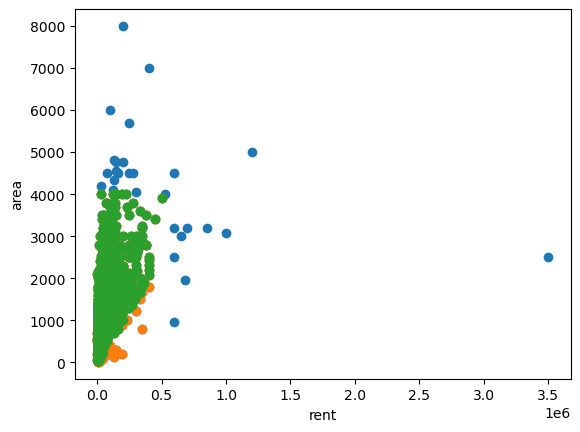

In [451]:
plt.plot(df['Rent'],df['Size'],'o')

df2=df.drop(df[df['Rent']>0.5*10**6].index,axis=0)

df2.reset_index(drop=True, inplace=True)

df3=df2.drop(df2[df2['Size']>4000].index,axis=0)

df3.reset_index(drop=True, inplace=True)

df3['Price_per_sqft']=round(df3['Rent']/df3['Size'],2)

df4=df3.drop(df3[df3['Price_per_sqft']>200].index,axis=0)

df4.reset_index(drop=True, inplace=True)

plt.plot(df3['Rent'],df3['Size'],'o')

plt.plot(df4['Rent'],df4['Size'],'o')

plt.xlabel("rent")
plt.ylabel("area")

In [452]:
df4

,BHK,Rent,Size,City,Furnishing Status,Bathroom,Price_per_sqft
0,2,10000,1100,Kolkata,Unfurnished,2,9.09
1,2,20000,800,Kolkata,Semi-Furnished,1,25.00
2,2,17000,1000,Kolkata,Semi-Furnished,1,17.00
3,2,10000,800,Kolkata,Unfurnished,1,12.50
4,2,7500,850,Kolkata,Unfurnished,1,8.82
...,...,...,...,...,...,...,...
4640,2,15000,1000,Hyderabad,Semi-Furnished,2,15.00
4641,3,29000,2000,Hyderabad,Semi-Furnished,3,14.50
4642,3,35000,1750,Hyderabad,Semi-Furnished,3,20.00
4643,3,45000,1500,Hyderabad,Semi-Furnished,2,30.00


In [453]:
X = df4.drop(['Rent'], axis=1)
Y = df4['Rent']

In [454]:
X

,BHK,Size,City,Furnishing Status,Bathroom,Price_per_sqft
0,2,1100,Kolkata,Unfurnished,2,9.09
1,2,800,Kolkata,Semi-Furnished,1,25.00
2,2,1000,Kolkata,Semi-Furnished,1,17.00
3,2,800,Kolkata,Unfurnished,1,12.50
4,2,850,Kolkata,Unfurnished,1,8.82
...,...,...,...,...,...,...
4640,2,1000,Hyderabad,Semi-Furnished,2,15.00
4641,3,2000,Hyderabad,Semi-Furnished,3,14.50
4642,3,1750,Hyderabad,Semi-Furnished,3,20.00
4643,3,1500,Hyderabad,Semi-Furnished,2,30.00


In [455]:
Y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4640    15000
4641    29000
4642    35000
4643    45000
4644    15000
Name: Rent, Length: 4645, dtype: int64

In [456]:
print(X.shape,Y.shape)

(4645, 6) (4645,)


In [457]:
# area_dummies = pd.get_dummies(X['Area Type'])
city_dummies = pd.get_dummies(X['City'])
furnish_dummies = pd.get_dummies(X['Furnishing Status'])



In [458]:
X=pd.concat([X,city_dummies,furnish_dummies],axis=1)
X

,BHK,Size,City,Furnishing Status,Bathroom,Price_per_sqft,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Furnished,Semi-Furnished,Unfurnished
0,2,1100,Kolkata,Unfurnished,2,9.09,0,0,0,0,1,0,0,0,1
1,2,800,Kolkata,Semi-Furnished,1,25.00,0,0,0,0,1,0,0,1,0
2,2,1000,Kolkata,Semi-Furnished,1,17.00,0,0,0,0,1,0,0,1,0
3,2,800,Kolkata,Unfurnished,1,12.50,0,0,0,0,1,0,0,0,1
4,2,850,Kolkata,Unfurnished,1,8.82,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,2,1000,Hyderabad,Semi-Furnished,2,15.00,0,0,0,1,0,0,0,1,0
4641,3,2000,Hyderabad,Semi-Furnished,3,14.50,0,0,0,1,0,0,0,1,0
4642,3,1750,Hyderabad,Semi-Furnished,3,20.00,0,0,0,1,0,0,0,1,0
4643,3,1500,Hyderabad,Semi-Furnished,2,30.00,0,0,0,1,0,0,0,1,0


In [459]:
X = X.drop(['City','Furnishing Status'], axis=1)


In [460]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [461]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# gb_model = GradientBoostingRegressor()
# gb_model.fit(X_train, Y_train)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))


0.7703741662752862
0.7400798919676461


Linear Regression Train RMSE: 22791.069161690924
Linear Regression Test RMSE: 21296.684079153052


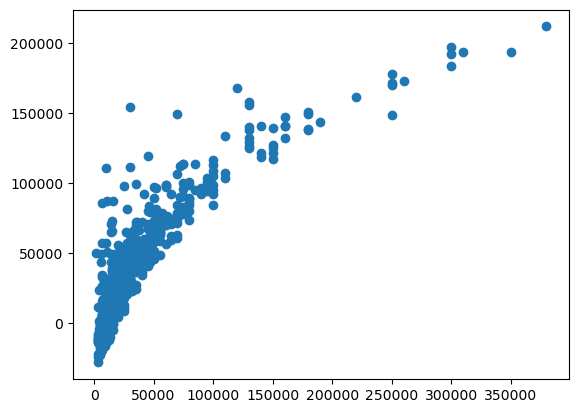

In [462]:
Y_linear_pred = linear_model.predict(X_test)
# gb_pred = gb_model.predict(X_test)
# combined_pred = np.mean([linear_pred, gb_pred], axis=0)

# rmse = np.sqrt(mean_squared_error(Y_test, combined_pred))
# print("Combined Model RMSE:", rmse)

linear_rmse_train = np.sqrt(mean_squared_error(Y_train, Y_pred_linear_train))
linear_rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred_linear_test))

print("Linear Regression Train RMSE:", linear_rmse_train)
print("Linear Regression Test RMSE:", linear_rmse_test)

plt.scatter(Y_test, Y_pred_linear_test)


In [ ]:
import pickle
filename = 'model house  using linear regression.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [467]:
import os

# Get the present working directory
current_directory = os.getcwd()

# Print the current directory
print(current_directory)
files = os.listdir(current_directory)
print(files)

C:\Users\LENOVO
['.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.snap', '.vscode', '3D Objects', 'AppData', 'Application Data', 'c++.cpp', 'CLionProjects', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'install.log', 'IntelGraphicsProfiles', 'java_error_in_clion64_32972.log', 'Links', 'Local Settings', 'model colours and markers.pkl', 'model house rent.pkl', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{ca2a5e38-d565-11eb-835b-0045e27ab950}.TM.blf', 'NTUSER.DAT{ca2a5e38-d565-11eb-835b-0045e27ab950}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{ca2a5e38-d565-11eb-835b-0045e27ab950}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'source', 'Start Menu', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled10.ipynb', 'Untitled11.ipynb', 